# ライブラリ調整

In [1]:
# !conda list opencv

# packages in environment at /Users/user/anaconda3:
#
# Name                    Version                   Build  Channel
libopencv                 4.2.0                    py37_2    conda-forge
opencv                    4.2.0                    py37_2    conda-forge
opencv-contrib-python     3.4.2.16                 pypi_0    pypi
opencv-python             3.4.2.16                 pypi_0    pypi
py-opencv                 4.2.0            py37h5ca1d4c_2    conda-forge


In [2]:
# SIFTを使用できるようにバージョンを下げる
# !pip install opencv-python==3.4.2.16
# !pip install opencv-contrib-python==3.4.2.16

In [3]:
# !conda list opencv

# packages in environment at /Users/user/anaconda3:
#
# Name                    Version                   Build  Channel
libopencv                 4.2.0                    py37_2    conda-forge
opencv                    4.2.0                    py37_2    conda-forge
opencv-contrib-python     3.4.2.16                 pypi_0    pypi
opencv-python             3.4.2.16                 pypi_0    pypi
py-opencv                 4.2.0            py37h5ca1d4c_2    conda-forge


In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# WEBサイトコピー　https://www.tech-tech.xyz/sift-surf-akaze.html

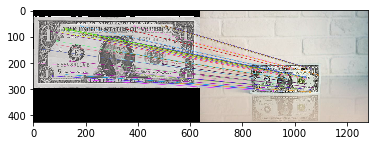

In [2]:
# WEBサイトコピー
img1 = cv2.imread('example_opencv_data/dollar.png')
img2 = cv2.imread('example_opencv_data/dollar_in_scene.png')

#特徴抽出機の生成
detector = cv2.xfeatures2d.SIFT_create()
#kpは特徴的な点の位置 destは特徴を現すベクトル
kp1, des1 = detector.detectAndCompute(img1, None)
kp2, des2 = detector.detectAndCompute(img2, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用
good = []
match_param = 0.5
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)
# cv2.imwrite("shift_result.png", img3)

plt.imshow(img3)
plt.show()

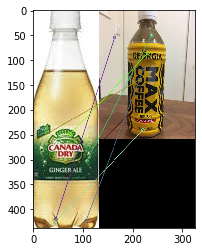

In [1050]:
# 正解でテスト
img1 = cv2.imread('example_opencv_data/temp/ジンジャエール.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('example_opencv_data/正解/maxコーヒー＿テスト.jpeg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#特徴抽出機の生成
detector = cv2.xfeatures2d.SIFT_create(contrastThreshold = 0.04, nfeatures=0, edgeThreshold = 4, sigma = 1)
#kpは特徴的な点の位置 destは特徴を現すベクトル
kp1, des1 = detector.detectAndCompute(img1, None)
kp2, des2 = detector.detectAndCompute(img2, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用
good = []
match_param = 0.775
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)
# cv2.imwrite("shift_result.png", img3)

plt.imshow(img3)
plt.show()

In [1057]:
des1.dtype

dtype('float32')

In [1051]:
len(kp1)

691

* 正解画像では特徴点が上手く捕らえられている

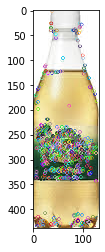

In [779]:
# 特徴点の表示
# テンプレート
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.imshow(out1)
plt.show()

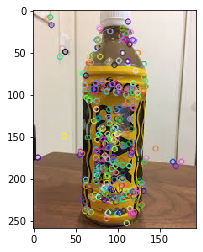

In [780]:
# 特徴点の表示
# オリジナルデータ
out2 = cv2.drawKeypoints(img2, kp2, None)
plt.imshow(out2)
plt.show()

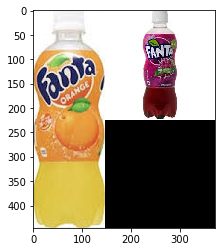

In [17]:
# 不正解でテスト
img1 = cv2.imread('example_opencv_data/temp/ファンタオレンジ.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('example_opencv_data/正解/ファンタグレープ.jpeg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#特徴抽出機の生成
detector = cv2.xfeatures2d.SIFT_create()
#kpは特徴的な点の位置 destは特徴を現すベクトル
kp1, des1 = detector.detectAndCompute(img1, None)
kp2, des2 = detector.detectAndCompute(img2, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用
good = []
match_param = 0.5
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good, None,flags=2)
# cv2.imwrite("shift_result.png", img3)

plt.imshow(img3)
plt.show()

* 不正解ラベルではマッチする特徴点がなく、正解と不正解を分離できている

# 正解、不正解データで評価
* 画像データはネットから取得し、ローカルに保存したものを使用

In [18]:
# 商品と価格の辞書（これをもとに金額を表示、合計する）
item_price = {'maxコーヒー':100, 'カルピス':110, 'ジンジャエール':120, 'ファンタオレンジ':130, '三ツ矢サイダー':140}

In [19]:
# テンプレート画像読み込み
path = "./example_opencv_data/temp"
temp_files = os.listdir(path)
temp_files = [files for files in temp_files if files.endswith("png")]
print(temp_files)

# テンプレートをarrayとしてリスト化
temp_data = []
for n, data in enumerate(temp_files):
    temp = cv2.imread("example_opencv_data/temp/" + data)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    temp_data.append(temp)

['ジンジャエール.png', 'カルピス.png', '三ツ矢サイダー.png', 'maxコーヒー.png', 'ファンタオレンジ.png']


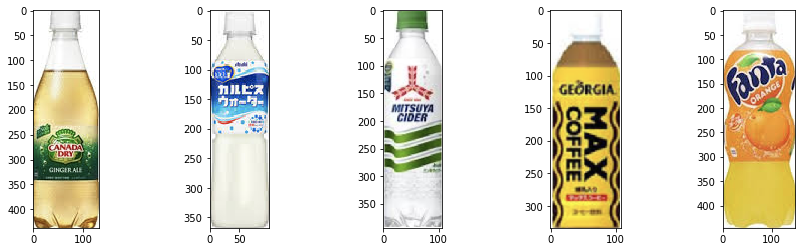

In [20]:
# テンプレート画像の表示（確認用）
plt.subplots(1, len(temp_data) ,figsize=(15, 4))
for n, img in enumerate(temp_data):
    plt.subplot(1, len(temp_data), n+1)
    plt.imshow(img)
plt.show()

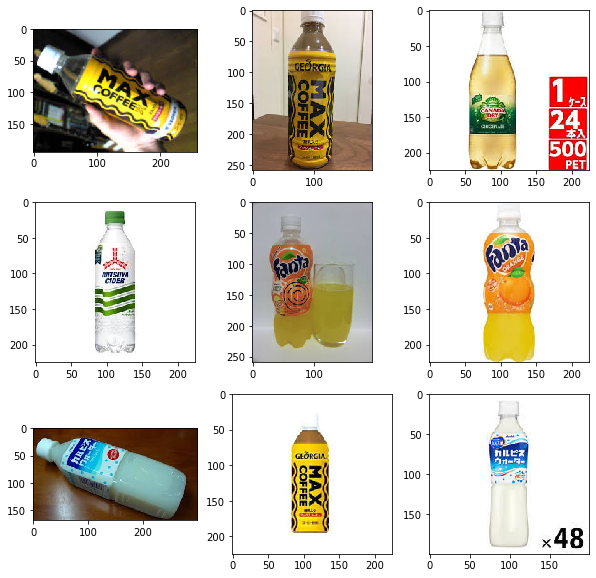

In [21]:
# テンプレートに対する正解データ
path = "./example_opencv_data/正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
plt.subplots(3, 3 ,figsize=(10, 10))
for n, data in enumerate(files):
    img = cv2.imread("example_opencv_data/正解/" + data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, n+1)
    plt.imshow(img)
plt.show()

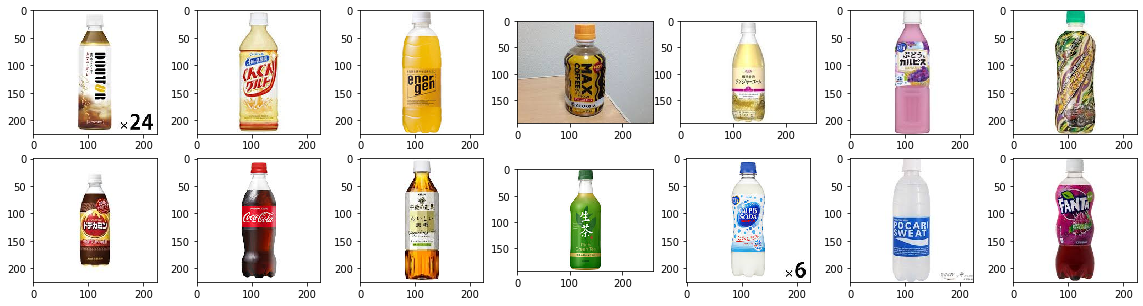

In [22]:
# 不正解データ
path = "./example_opencv_data/不正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
plt.subplots(2, 7 ,figsize=(20, 5))
for n, data in enumerate(files):
    img = cv2.imread("example_opencv_data/不正解/" + data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 7, n+1)
    plt.imshow(img)
plt.show()

In [1535]:
# 画像分類
def classfiler(files, path, param=0.59, num=6):
    """
    SIFTを用いた画像分類
    パラメーターとして以下を調整
    param：最も近い点と2番目に近い点の距離の比率。
    num：マッチした特徴点の数の下限
    """
    # 合計金額の初期化
    price_sum = 0
    for data in files:
        #識別したい画像を読み込む
        img = cv2.imread(path + "/" + data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # 画像マッチング
        for temp, temp_file in zip(temp_data, temp_files):
            #特徴抽出機の生成
            detector = cv2.xfeatures2d.SIFT_create(contrastThreshold = 0.1675, nfeatures=0, edgeThreshold =4, sigma = 1.6)
            #kpは特徴的な点の位置 destは特徴を現すベクトル
            kp1, des1 = detector.detectAndCompute(temp, None)
            kp2, des2 = detector.detectAndCompute(img, None)
            
            
            print(len(kp1))
            print(len(kp2))
            
            
            #特徴点の比較機
            bf = cv2.BFMatcher(cv2.NORM_L2)
            matches = bf.knnMatch(des1,des2, k=2)
            #割合試験を適用(２番目との差を param)
            good = []
            match_param = param
            for m,n in matches:
                if m.distance < match_param*n.distance:
                    good.append([m])
            # good特徴点 num 個以上でマッチしたとする
            if len(good)>num:
                
                
                # テンプレート表示
                plt.subplots(1,2,figsize=(5, 5))
                plt.subplot(1,2,1)
                plt.title('temp')
                plt.imshow(temp)
                # origin表示
                plt.subplot(1,2,2)
                plt.title('origin')
                plt.imshow(img)
                plt.show()
                
                
                # デバッグ
                # 特徴量の数
                print(len(kp1))
                #cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
                img_match = cv2.drawMatchesKnn(temp,kp1,img,kp2,good, None,flags=2)
                plt.imshow(img_match)
                plt.show()
                
                # 値段表示
                item = temp_file.strip(".png'")
                price = item_price[item]
                price_sum += price
                print("{}：{}円".format(item, price))
                print("合計金額：", price_sum, "円")

46
59
36
59
78
59
107
59


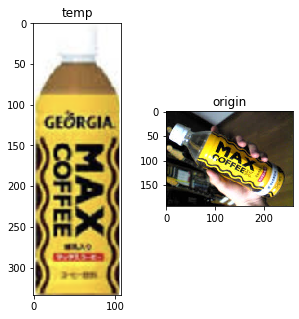

107


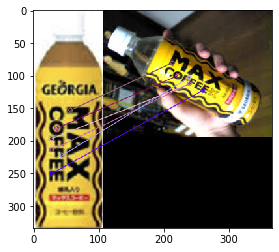

maxコーヒー：100円
合計金額： 100 円
36
59
46
13
36
13
78
13
107
13


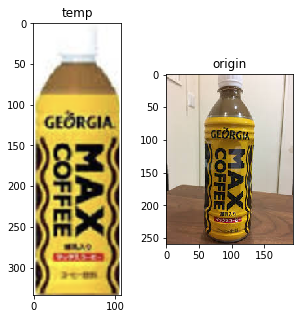

107


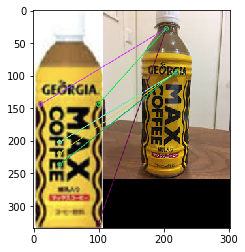

maxコーヒー：100円
合計金額： 200 円
36
13
46
115


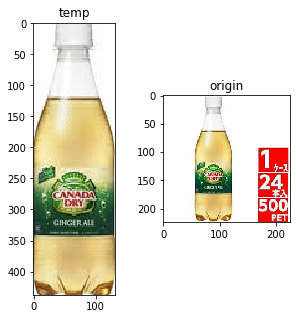

46


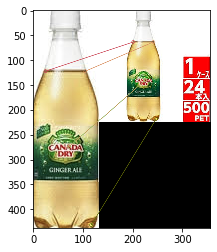

ジンジャエール：120円
合計金額： 320 円
36
115
78
115
107
115
36
115
46
36
36
36
78
36


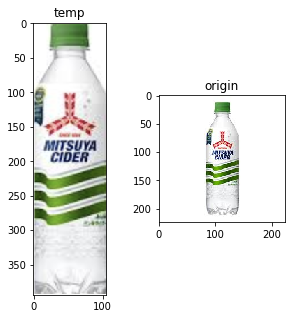

78


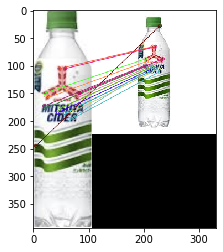

三ツ矢サイダー：140円
合計金額： 460 円
107
36
36
36
46
11
36
11
78
11
107
11
36
11


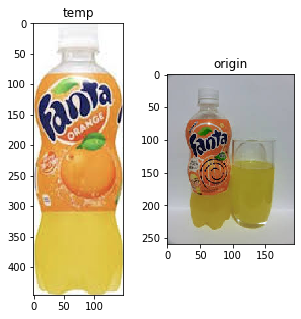

36


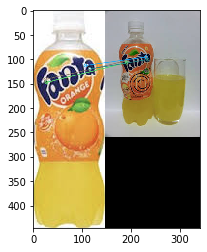

ファンタオレンジ：130円
合計金額： 590 円
46
19
36
19
78
19
107
19
36
19


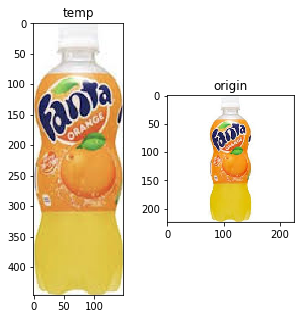

36


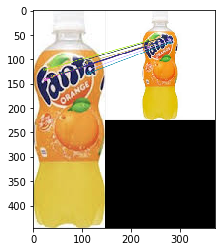

ファンタオレンジ：130円
合計金額： 720 円
46
42
36
42


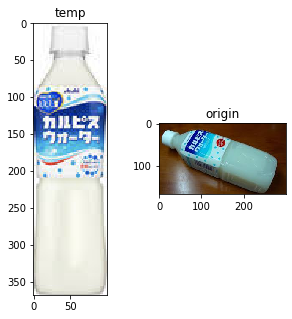

36


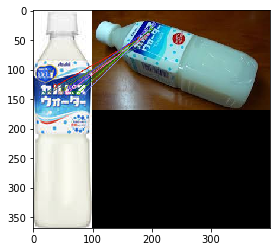

カルピス：110円
合計金額： 830 円
78
42
107
42
36
42
46
63
36
63
78
63
107
63


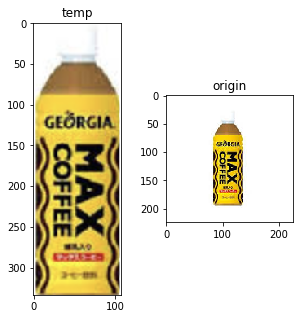

107


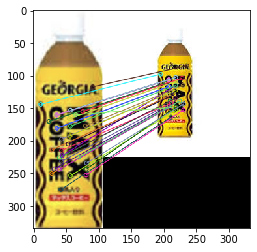

maxコーヒー：100円
合計金額： 930 円
36
63
46
39
36
39


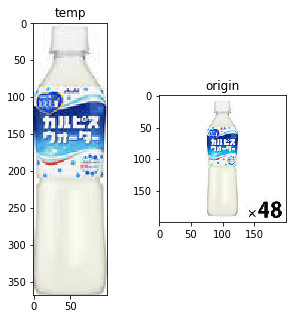

36


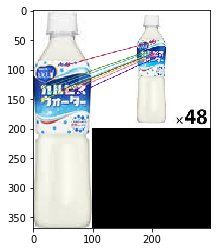

カルピス：110円
合計金額： 1040 円
78
39
107
39
36
39


In [1536]:
# 正解データ
# contrastThreshold = 0.17, nfeatures=0
path = "./example_opencv_data/正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
classfiler(files, path, param=0.72, num=4)

46
71
36
71
78
71
107
71
36
71
46
53
36
53
78
53
107
53
36
53
46
31
36
31
78
31
107
31
36
31
46
9
36
9
78
9
107
9
36
9
46
9
36
9
78
9
107
9
36
9
46
42
36
42
78
42
107
42
36
42
46
8
36
8
78
8
107
8


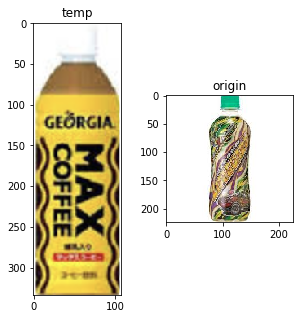

107


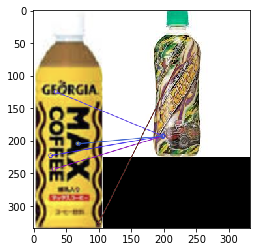

maxコーヒー：100円
合計金額： 100 円
36
8
46
41
36
41
78
41
107
41
36
41
46
31
36
31
78
31
107
31
36
31
46
24
36
24
78
24
107
24
36
24
46
32
36
32
78
32
107
32
36
32
46
32
36
32
78
32
107
32
36
32
46
37
36
37
78
37
107
37
36
37
46
35
36
35
78
35
107
35
36
35


In [1537]:
# 不正解データ
path = "./example_opencv_data/不正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
classfiler(files, path, param=0.72, num=4)

### 現状
* 正解データ対しては、商品の角度や明るさに関係なく全て識別できている
* 不正解データに対して、違いが大きさのみの画像（maxコーヒー）以外は識別できている

### 今後
* 現実を考慮すると、不正解データに対しても明るさや角度を変化させた検証が必要
* 実際の写真データで検証
* 各トリガーとの繋ぎ方（処理の流れや、終わり方）

# その他の特徴量抽出方法（上記手法でうまくいかなかった場合検討）

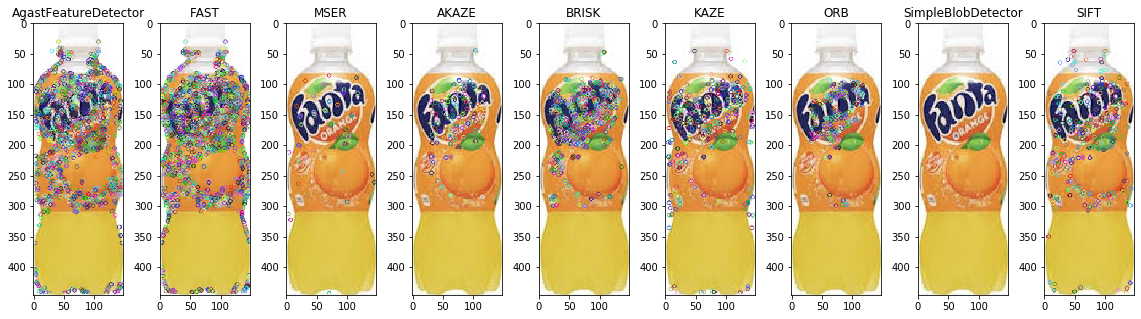

In [447]:
plt.subplots(1,9,figsize=(20, 5))

# AgastFeatureDetector
detector = cv2.AgastFeatureDetector_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,1)
plt.imshow(out1)
plt.title('AgastFeatureDetector')

# FAST
detector = cv2.FastFeatureDetector_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,2)
plt.imshow(out1)
plt.title('FAST')

# MSER
detector = cv2.MSER_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,3)
plt.imshow(out1)
plt.title('MSER')

# AKAZE
detector = cv2.AKAZE_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,4)
plt.imshow(out1)
plt.title('AKAZE')

# BRISK
detector = cv2.BRISK_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,5)
plt.imshow(out1)
plt.title('BRISK')

# KAZE
detector = cv2.KAZE_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,6)
plt.imshow(out1)
plt.title('KAZE')

# ORB (Oriented FAST and Rotated BRIEF)
detector = cv2.ORB_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,7)
plt.imshow(out1)
plt.title('ORB')

# SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create()
# kp1, des1 = detector.detectAndCompute(img1, None)
kp1 = detector.detect(img1)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,8)
plt.imshow(out1)
plt.title('SimpleBlobDetector')

# SIFT
detector = cv2.xfeatures2d.SIFT_create()
kp1, des1 = detector.detectAndCompute(img1, None)
out1 = cv2.drawKeypoints(img1, kp1, None)
plt.subplot(1,9,9)
plt.imshow(out1)
plt.title('SIFT')

plt.show()

# 方法による比較

In [1489]:
method = {"AgastFeatureDetector" : cv2.AgastFeatureDetector_create(),
          "FastFeatureDetector" : cv2.FastFeatureDetector_create(),
          "MSER" : cv2.MSER_create(),
          "AKAZE" : cv2.AKAZE_create(threshold=0.0001, descriptor_channels=3, diffusivity=3, descriptor_type=4, nOctaveLayers=4),
          "BRISK" : cv2.BRISK_create(thresh = 70, patternScale = 1),
          "KAZE" : cv2.KAZE_create(),
          "ORB" : cv2.ORB_create(),
          "SIFT" : cv2.xfeatures2d.SIFT_create(),
          "SimpleBlobDetector" : cv2.SimpleBlobDetector_create()}

In [1490]:
method["AKAZE"].getDescriptorType()

4

In [1491]:
method["AKAZE"].getThreshold()

9.999999747378752e-05

In [1492]:
# 特徴量抽出
def keypoints(img1, name):
    kp1 = method[name].detect(img1)
    out1 = cv2.drawKeypoints(img1, kp1, None)
    plt.imshow(out1)
    plt.title(name)
    plt.show()
    
# 画像分類
# ORB, AKAZE, KAZE, BRISK, SIFTは、特徴点だけではなく、特徴量も計算できる。
def matches(files, path, name, param=0.5, num=10):
    price_sum = 0
    for data in files:
        #識別したい画像を読み込む
        img = cv2.imread(path + "/" + data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # 画像マッチング
        for temp, temp_file in zip(temp_data, temp_files):
            
            
            ######
            # 前処理
            kernel = np.ones((15,15),np.uint8)
            temp = cv2.morphologyEx(temp, cv2.MORPH_BLACKHAT, kernel)
            img = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
            
            
            #特徴抽出機の生成
            #kpは特徴的な点の位置 destは特徴を現すベクトル
            kp1, des1 = method[name].detectAndCompute(temp, None)
            kp2, des2 = method[name].detectAndCompute(img, None)
            #特徴点の比較機
            bf = cv2.BFMatcher(cv2.NORM_HAMMING)
            matches = bf.knnMatch(des1,des2, k=2)
            #割合試験を適用(２番目との差を param)
            good = []
            match_param = param
            for m,n in matches:
                if m.distance < match_param*n.distance:
                    good.append([m])
            # good特徴点 num 個以上でマッチしたとする
            if len(good)>num:
                # テンプレート表示
                plt.subplots(1,2,figsize=(5, 5))
                plt.subplot(1,2,1)
                plt.title('temp')
                plt.imshow(temp)
                # origin表示
                plt.subplot(1,2,2)
                plt.title('origin')
                plt.imshow(img)
                plt.show()
                
                
                # デバッグ
                # 特徴量の数
                print(len(kp1))
                #cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
                img_match = cv2.drawMatchesKnn(temp,kp1,img,kp2,good, None,flags=2)
                plt.imshow(img_match)
                plt.show()
                
                # 値段表示
                item = temp_file.strip(".png'")
                price = item_price[item]
                price_sum += price
                print("{}：{}円".format(item, price))
                print("合計金額：", price_sum, "円")

176


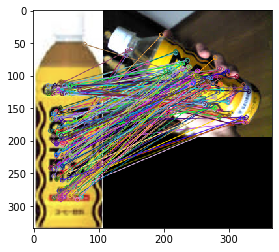

In [1480]:
temp_test = cv2.imread('example_opencv_data/temp/maxコーヒー.png')
temp_test = cv2.cvtColor(temp_test, cv2.COLOR_BGR2RGB)
img_test = cv2.imread('example_opencv_data/正解/maxコーヒー＿手持ち.jpeg')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

detector = cv2.BRISK_create(thresh = 40, patternScale = 1)
kp1, des1 = detector.detectAndCompute(temp_test, None)
kp2, des2 = detector.detectAndCompute(img_test, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用(２番目との差を param)
good = []
match_param = 1
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
    
# デバッグ
# 特徴量の数
print(len(kp1))
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img_match = cv2.drawMatchesKnn(temp_test,kp1,img_test,kp2,good, None,flags=2)
plt.imshow(img_match)
plt.show()

123


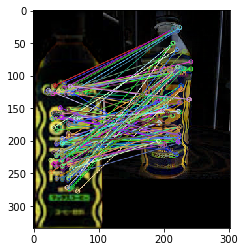

In [1488]:
temp_test = cv2.imread('example_opencv_data/temp/maxコーヒー.png')
temp_test = cv2.cvtColor(temp_test, cv2.COLOR_BGR2RGB)
img_test = cv2.imread('example_opencv_data/正解/maxコーヒー＿テスト.jpeg')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

kernel = np.ones((15,15),np.uint8)
# temp_test = cv2.erode(temp_test,kernel,iterations = 1)
# img_test = cv2.erode(img_test,kernel,iterations = 1)
# temp_test = cv2.dilate(temp_test,kernel,iterations = 1)
# img_test = cv2.dilate(img_test,kernel,iterations = 1)
# temp_test = cv2.morphologyEx(temp_test, cv2.MORPH_OPEN, kernel)
# img_test = cv2.morphologyEx(img_test, cv2.MORPH_OPEN, kernel)
# temp_test = cv2.morphologyEx(temp_test, cv2.MORPH_CLOSE, kernel)
# img_test = cv2.morphologyEx(img_test, cv2.MORPH_CLOSE, kernel)
# temp_test = cv2.morphologyEx(temp_test, cv2.MORPH_GRADIENT, kernel)
# img_test = cv2.morphologyEx(img_test, cv2.MORPH_GRADIENT, kernel)
#######
# temp_test = cv2.morphologyEx(temp_test, cv2.MORPH_TOPHAT, kernel)
# img_test = cv2.morphologyEx(img_test, cv2.MORPH_TOPHAT, kernel)
temp_test = cv2.morphologyEx(temp_test, cv2.MORPH_BLACKHAT, kernel)
img_test = cv2.morphologyEx(img_test, cv2.MORPH_BLACKHAT, kernel)

detector = cv2.BRISK_create(thresh = 70, patternScale = 1)
kp1, des1 = detector.detectAndCompute(temp_test, None)
kp2, des2 = detector.detectAndCompute(img_test, None)
#特徴点の比較機
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用(２番目との差を param)
good = []
match_param = 1
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
    
# デバッグ
# 特徴量の数
print(len(kp1))
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img_match = cv2.drawMatchesKnn(temp_test,kp1,img_test,kp2,good, None,flags=2)
plt.imshow(img_match)
plt.show()

119


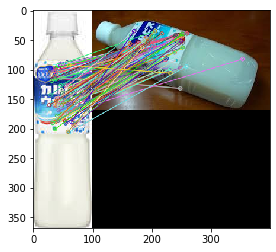

In [1460]:
temp_test = cv2.imread('example_opencv_data/temp/カルピス.png')
temp_test = cv2.cvtColor(temp_test, cv2.COLOR_BGR2RGB)
img_test = cv2.imread('example_opencv_data/正解/カルピス＿テスト.jpeg')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

detector = cv2.BRISK_create(thresh = 30, patternScale = 2)
kp1, des1 = detector.detectAndCompute(temp_test, None)
kp2, des2 = detector.detectAndCompute(img_test, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用(２番目との差を param)
good = []
match_param = 1
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
    
# デバッグ
# 特徴量の数
print(len(kp1))
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
img_match = cv2.drawMatchesKnn(temp_test,kp1,img_test,kp2,good, None,flags=2)
plt.imshow(img_match)
plt.show()

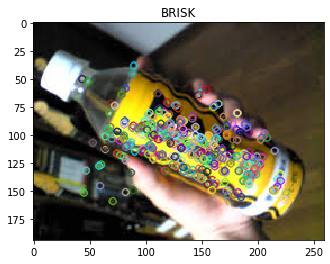

In [1171]:
# BRISK
img_test = cv2.imread('example_opencv_data/正解/maxコーヒー＿手持ち.jpeg')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
detector = cv2.BRISK_create(thresh = 30, patternScale = 2)
kp1, des1 = detector.detectAndCompute(img_test, None)
out1 = cv2.drawKeypoints(img_test, kp1, None)
plt.imshow(out1)
plt.title('BRISK')
plt.show()

In [1135]:
des1.dtype

dtype('uint8')

In [1136]:
len(kp1)

28

In [1063]:
detector.getNOctaveLayers()

AttributeError: 'cv2.BRISK' object has no attribute 'getNOctaveLayers'

In [969]:
detector.getDescriptorSize()

AttributeError: 'cv2.BRISK' object has no attribute 'getDescriptorSize'

In [936]:
detector.getDiffusivity()

3

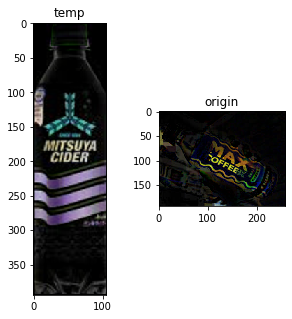

124


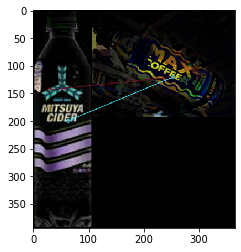

三ツ矢サイダー：140円
合計金額： 140 円


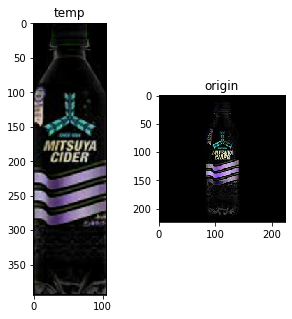

124


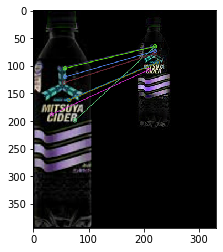

三ツ矢サイダー：140円
合計金額： 280 円


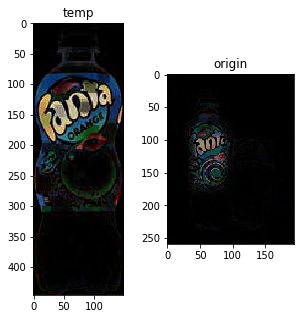

173


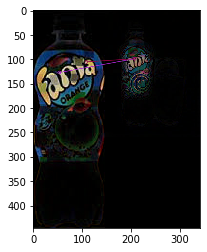

ファンタオレンジ：130円
合計金額： 410 円


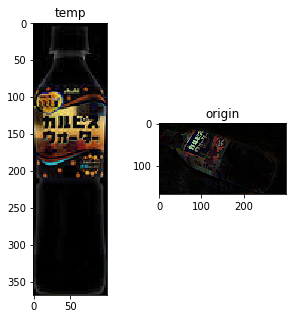

124


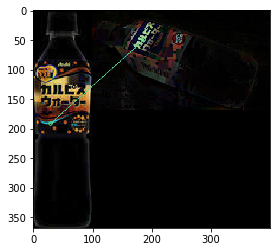

カルピス：110円
合計金額： 520 円


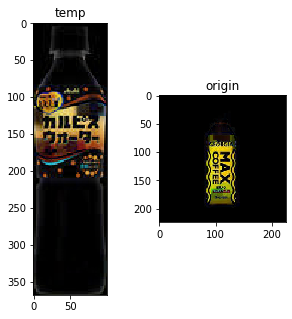

124


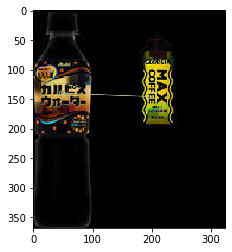

カルピス：110円
合計金額： 630 円


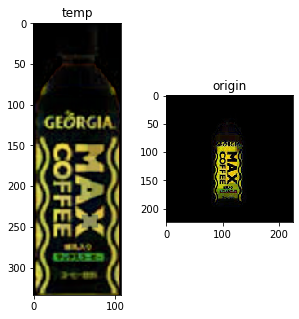

123


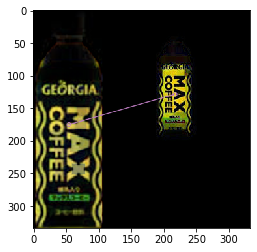

maxコーヒー：100円
合計金額： 730 円


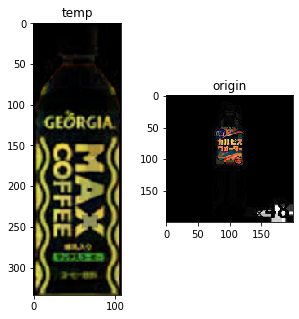

123


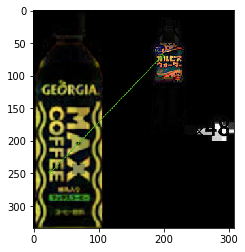

maxコーヒー：100円
合計金額： 830 円


In [1494]:
# ORB, AKAZE, KAZE, BRISK, SIFTは、特徴点だけではなく、特徴量も計算できる。
# 正解データ
path = "./example_opencv_data/正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
matches(files, path, "BRISK", param=0.7, num=0)

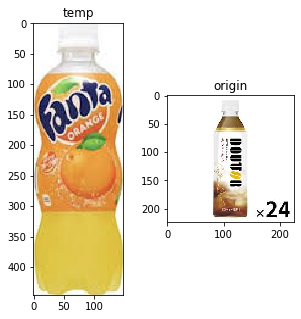

270


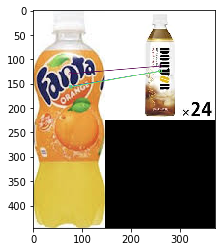

ファンタオレンジ：130円
合計金額： 130 円


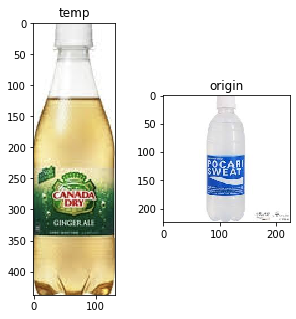

205


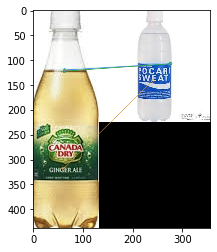

ジンジャエール：120円
合計金額： 250 円


In [1064]:
# 不正解データ
path = "./example_opencv_data/不正解"
files = os.listdir(path)
files = [files for files in os.listdir(path) if files.endswith("jpeg")]
matches(files, path, "BRISK", param=0.8, num=1)